# Testing Bomanz high-speed ADC

## Testing at 10MHz

Doing the tests with the [signal emulator](https://github.com/kelu124/echomods/tree/master/silent)

In [107]:
File = "10MHz/10MHz_adc.csv"
import matplotlib.pyplot as plt
import numpy as np
from ADC08200 import CreateSeries

In [109]:
Res, t = CreateSeries(File,1000.0)

Testing if we get the raw signal as we thing we should

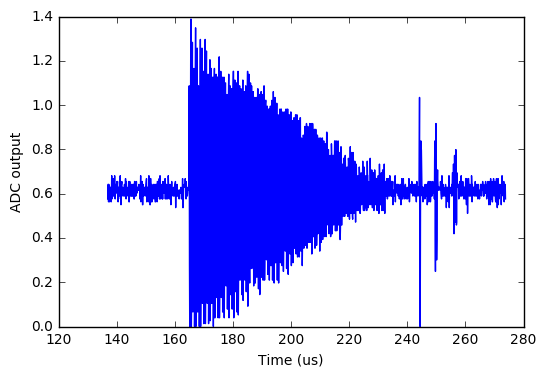

In [110]:
RefT = 1500
plt.plot(t[RefT+0:RefT+1500],Res[RefT+0:RefT+1500])  # plotting 50x 100ns, that's 5µs
plt.ylabel('ADC output')
plt.xlabel("Time (us)")
plt.show()

## Checking the frequency

As the emulator is a bit below 2MHz, we should see something accordingly

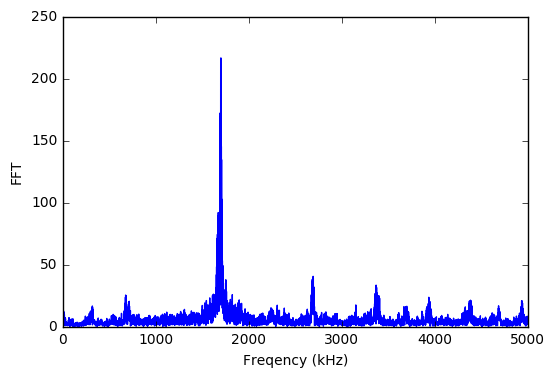

In [111]:
FFT = np.fft.fft(Res)
FFT[0]=0
Freqs = range(5000)
plt.plot(Freqs,abs(FFT[0:5000]))  # plotting 50x 100ns, that's 5µs
plt.ylabel('FFT')
plt.xlabel("Freqency (kHz)")
plt.show()

In [ ]:
## Testing with a crappy situation

Real piezo, 

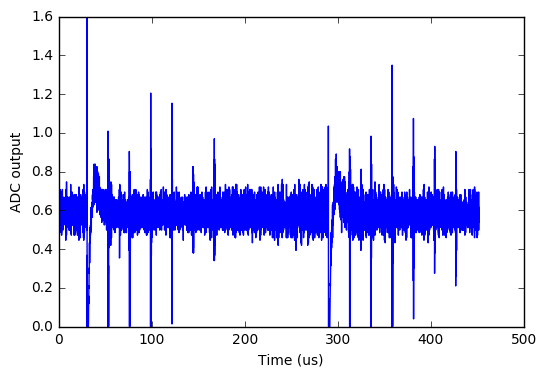

In [122]:
Res, t = CreateSeries("10MHz/10MHz_tasse_smartmaterials.csv",2000.0)
RefT = 50*10
plt.plot(t,Res)  # plotting 50x 100ns, that's 5µs
plt.ylabel('ADC output')
plt.xlabel("Time (us)")
plt.show()

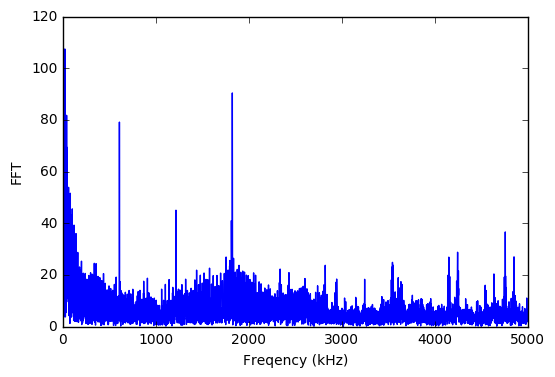

In [123]:
FFT = np.fft.fft(Res)
FFT[0]=0
Freqs = range(5000)
plt.plot(Freqs,abs(FFT[0:5000]))  # plotting 50x 100ns, that's 5µs
plt.ylabel('FFT')
plt.xlabel("Freqency (kHz)")
plt.show()